In [12]:
%matplotlib inline
import time
import matplotlib.pyplot as plt
import numpy as np

In [13]:
path= "../week1/temp/"
train_x= np.load( path + "train_data.npy")
train_y= np.load( path + "train_labels.npy")
test_x= np.load( path + "test_data.npy")
test_y= np.load( path + "test_labels.npy")

In [14]:
np.shape(train_x),np.shape(test_x)

((7500, 784), (1000, 784))

In [15]:
train_digits, train_counts= np.unique(train_y, return_counts=True)
print("Training set distribution:")
print(dict(zip(train_digits, train_counts)))

Training set distribution:
{0: 750, 1: 750, 2: 750, 3: 750, 4: 750, 5: 750, 6: 750, 7: 750, 8: 750, 9: 750}


In [16]:
def shower( data):
    plt.axis('off')
    plt.imshow( data.reshape( 28, 28))
    plt.show()
    return

def vis( index, dataset= 'train'):
    if dataset == 'train':
        data= train_x[ index]
        label= train_y[ index]
    else:
        data= test_x[ index]
        label= test_y[ index]
    print('Digit is ' + str(label))
    shower( data)
    return  

Digit is 0


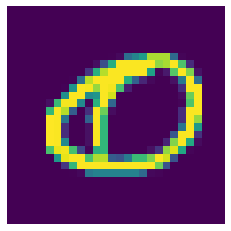

In [17]:
vis( 0, 'test')

In [18]:
def euc_dist( x, y):
    return np.sum( np.square( x - y))

In [19]:
euc_dist( train_x[4], train_x[5])

5357193.0

In [23]:
def nn( index):
    dist= [ euc_dist( test_x[ index], i) for i in train_x]
    vis( index, 'test')
    pred= train_y[np.argmin( dist)]
    print( 'Classified as ' + str( pred))
    return pred

Digit is 3


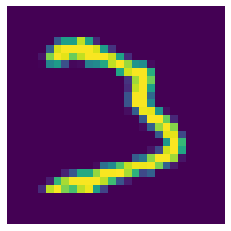

Classified as 2


2

In [24]:
nn( 39)

In [29]:
labels= [ b'NO', b'DH', b'SL']
data= np.loadtxt( '../week1/NN_spine/column_3C.dat', converters= {6: lambda s: labels.index(s)})

In [30]:
x= data[ :, 0:6]
y= data[ :, 6]
training_indices = list(range(0,20)) + list(range(40,188)) + list(range(230,310))
test_indices = list(range(20,40)) + list(range(188,230))

trainx = x[training_indices,:]
trainy = y[training_indices]
testx = x[test_indices,:]
testy = y[test_indices]

In [31]:
def NN_L2( trainx, trainy, testx):
    preds= []
    for test in testx:
        l2= lambda x, y: np.sqrt( np.sum(np.square( x -y)))
        preds.append( trainy[np.argmin([ l2( test, train) 
                                        for train in trainx])])
    return np.array( preds)

def NN_L1( trainx, trainy, testx):
    preds= []
    for test in testx:
        l2= lambda x, y: np.sum(np.abs( x -y))
        preds.append( trainy[np.argmin([ l2( test, train) 
                                        for train in trainx])])
    return np.array( preds)

In [45]:
def confusion(testy,testy_fit):
    testy= testy.astype( 'int')
    testy_fit= testy_fit.astype( 'int')
    matrix= np.zeros( (3, 3))
    for index, value in enumerate(testy):
        matrix[ value, testy_fit[ index]]+= 1

    return matrix

In [46]:
confusion( testy, NN_L1( trainx, trainy, testx))

array([[16.,  2.,  2.],
       [10., 10.,  0.],
       [ 0.,  0., 22.]])